In [1]:
from bs4 import BeautifulSoup
import requests
import selenium
from selenium import webdriver
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os
import time
import numpy as np
import numpy

In [9]:
def clean_salary(i):
    i = i.replace('k','').replace('M','').replace('$','').replace('£','')
    return (i)

In [10]:
def avg(i):
    if type(i) != float:
        try:
            average = (clean_salary(i).split('–')[0] + clean_salary(i).split('–')[1]) / 2
        except:
            average = clean_salary(i)
        return average
    else:
        return str(np.nan)

In [11]:
ss = ['buyer']

In [5]:
driver = webdriver.Chrome(executable_path='./chromedriver')
pre = 1
post = 0
full = pd.read_csv('./Jobs/full_jobs_df.csv')
while pre != post:
    for title_name in ss.copy():
        pre = len(ss)
        title_list = []
        job_name = title_name.replace(' ','_')
        job_url_name = job_name.replace('_','+')
        pre_url = f'https://www.google.com/search?q={job_url_name}&ibp=htl;jobs#fpstate=tldetail&htidocid='
    #     driver = webdriver.Chrome(executable_path='./chromedriver')

        test_url = f'https://www.google.com/search?q={job_url_name}&ibp=htl;jobs'
        driver.get(test_url)
        proceed = 0
    #     while proceed != 'Y':
    #         proceed = input('Are You Ready To Proceed? (Y/N)')
        for i in [pre_url+link.attrs['id'][4:] for link in BeautifulSoup(driver.page_source, 'lxml').find_all('div',{'jsname':'x5pWN'})]:
            driver.get(i)
        soup = BeautifulSoup(driver.page_source, 'lxml')
        jobs = soup.find_all('li')
        job_list = []
        for job in jobs:
            if (job.find('h2',{'jsname':'SBkjJd'}) != None) and (len(job.find_all('div',{'class':'tcoBdd'}))>1):
                job_dic = {}
                job_dic['title']= job.find('h2',{'jsname':'SBkjJd'}).text
                title_list.append(job_dic['title'])
                job_dic['company']=job.find('div',{'class':'pbHUre tcoBdd'}).text
                job_dic['body']=job.find('span',{'style':'line-height:1.5em'}).text
                job_dic['location']=job.find_all('div',{'class':'tcoBdd'})[1].text
                try:
                    job_dic['salary']=job.find('span',{'class':'zE8vH'}).text.replace('CA','')
                except:
                    job_dic['salary']=np.nan
                job_dic['avg_salary']=avg(job_dic['salary'])
                job_list.append(job_dic)
#         full = pd.read_csv('./Jobs/full_jobs_df.csv')
#        full.avg_salary = full.avg_salary.astype('object')
        new = pd.DataFrame(job_list)
        try:
            new.salary = new.salary.astype('object')
            full = pd.merge(full,new,how='outer')
            full.drop_duplicates(inplace=True)
            full.body = full.body.str.lower()
            full.to_csv('./Jobs/full_jobs_df.csv',index=False)
        except:
            pass
        
    #     driver.quit()
        print(f'We now have {full.shape[0]} jobs')
        print(f'{full.avg_salary.notnull().sum()} of these jobs have a salary')
#         time.sleep(5)
    for title in title_list:
        ss.append(title)
        ss = list(dict.fromkeys(ss))
    post = len(ss)
driver.quit()

EmptyDataError: No columns to parse from file

In [ ]:
full.head()

In [8]:
[job for job in jobs][0].find('span',{'class':'Cyt8W'})

NameError: name 'jobs' is not defined

In [12]:
def manually_get_job_data(job_name):
    job_name = job_name.replace(' ','_')
    job_url_name = job_name.replace('_','+')
    pre_url = f'https://www.google.com/search?q={job_url_name}&ibp=htl;jobs#fpstate=tldetail&htidocid='
    driver = webdriver.Chrome(executable_path='./chromedriver')
    print( 'hi' ) 
    test_url = f'https://www.google.com/search?q={job_url_name}&ibp=htl;jobs'
    driver.get(test_url)
    proceed = 0
    while proceed != 'Y':
        proceed = input('Are You Ready To Proceed? (Y/N)').upper()
    for i in [pre_url+link.attrs['id'][4:] for link in BeautifulSoup(driver.page_source, 'lxml').find_all('div',{'jsname':'x5pWN'})]:
        driver.get(i)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    jobs = soup.find_all('li')
    print(jobs)
    job_list = []
    for job in jobs:
        if (job.find('h2',{'jsname':'SBkjJd'}) != None) and (len(job.find_all('div',{'class':'tcoBdd'}))>1):
            job_dic = {}
            job_dic['title']= job.find('h2',{'jsname':'SBkjJd'}).text
            job_dic['company']=job.find('div',{'class':'pbHUre tcoBdd'}).text
            job_dic['body']=job.find('span',{'style':'line-height:1.5em'}).text
            job_dic['location']=job.find_all('div',{'class':'tcoBdd'})[1].text
            try:
                job_dic['salary']=job.find('span',{'class':'zE8vH'}).text.replace('CA','')
            except:
                job_dic['salary']=np.nan
            job_dic['avg_salary']=avg(job_dic['salary'])
            job_list.append(job_dic)
    
    
    print(job_list)
    print(job_dic)
  #  full = pd.read_csv('./Jobs/full_jobs_df.csv')
  #  full.avg_salary = full.avg_salary.astype('object')
    new = pd.DataFrame(job_list)
   # try:
   #     new.salary = new.salary.astype('object')
   #     full = pd.merge(full,new,how='outer')
   #     full.drop_duplicates(inplace=True)
   #     full.body = full.body.str.lower()
   #     full.to_csv('./Jobs/full_jobs_df.csv',index=False)
   # except:
   #     pass

    driver.quit()
   # print(f'We now have {full.shape[0]} jobs')
   # print(f'{full.avg_salary.notnull().sum()} of these jobs have a salary')
    return 

Enter Job Titleremote
hi
Are You Ready To Proceed? (Y/N)Y
[<li class="iFjolb hide-focus-ring gws-plugins-horizon-jobs__li-ed" data-ved="0ahUKEwjUk6e84tnrAhUjyoUKHWcXBcIQmLkECOsHKAAwAA"><style>.PwjeAc{position:relative;width:100%;}.lR4X6c{border:0 solid #ebebeb;border-top-width:1px;}.VwLP8e a{color:#000}</style><div class="PwjeAc"><div jsaction="i4g41:qFm1Qd;QvSnAb:qFm1Qd;rcuQ6b:npT2md" jscontroller="EUWmse" jsdata="jioNEe;;BSp7ek"><div jsname="R6bc9e" style="display:none"><div class="KGjGe" data-encoded-doc-id="n6nQEfiTcset6autAAAAAA==" data-log-latest-action-to-footprints="0" data-log-save-action-to-footprints="0" data-ved="2ahUKEwj7pMa94tnrAhVMzYUKHS9aBl04ChDKjwIwCXoFCAEQmgM" id="gws-plugins-horizon-jobs__job_details_page" jsaction="taaY8b:xQPftf;GoJgKc:YoUZTc;HA6b5c:NkOmd;O0lrlf:t418hc;i4g41:qFm1Qd;kZ1PMe:bSdr0c;LuNU2d:FhQqFc;rcuQ6b:npT2md" jscontroller="J7781" jsdata="aI4ERb;;BSzThI" jsname="c6W1S"><div class="pE8vnd avtvi"><div class="sVx81"><div class="OghIW"><div class="sH3zFd">
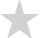
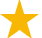
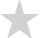
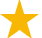

UnboundLocalError: local variable 'job_dic' referenced before assignment

In [13]:
word = input("Enter Job Title")
manually_get_job_data(word)

In [ ]:
who

In [ ]:
whos